# Digit recognition in Machine Learning with RandomForest classifier


## Desription

The MNSIT dataset is composed of a set of 42 000 images for trainging with a resolution of 28x28x1 in grayscale.


## Initialisation


### Load data

In [1]:
import pandas as pd

df_train = pd.read_csv("Datasets/train.csv")
y = df_train["label"]
X = df_train.drop("label", axis=1)


### Show images info


In [2]:
print(df_train.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


### Plot images

Plot images as BW with reversed BW.


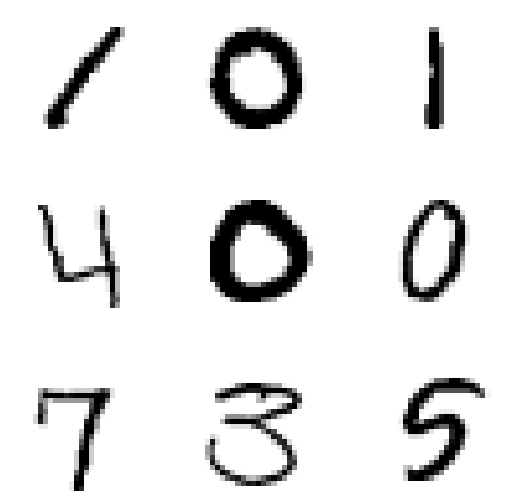

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X.iloc[i, 0:].values.reshape(28, 28), cmap=plt.cm.gray_r)
    plt.axis("off")
plt.show()

## Split data

In [5]:
from sklearn.model_selection import train_test_split

# No use now, handled by gridsearch
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Hyper-parameters tuning

In [6]:
### Hyper-parameters tuning and cross validation with data split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

steps = [('scaler', MinMaxScaler()), ('rnd_forest', RandomForestClassifier())]
pipeline = Pipeline(steps)

grid_params = {'rnd_forest__n_estimators': [10, 100, 200, 400, 600, 800, 1000]}

gsCV = GridSearchCV(pipeline, grid_params, verbose=4, cv=5)

In [7]:
print(gsCV.fit(X_train, y_train))

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END .......rnd_forest__n_estimators=10;, score=0.932 total time=   1.7s
[CV 2/5] END .......rnd_forest__n_estimators=10;, score=0.937 total time=   1.6s
[CV 3/5] END .......rnd_forest__n_estimators=10;, score=0.934 total time=   1.6s
[CV 4/5] END .......rnd_forest__n_estimators=10;, score=0.933 total time=   1.6s
[CV 5/5] END .......rnd_forest__n_estimators=10;, score=0.928 total time=   1.6s
[CV 1/5] END ......rnd_forest__n_estimators=100;, score=0.964 total time=  12.9s
[CV 2/5] END ......rnd_forest__n_estimators=100;, score=0.965 total time=  12.8s
[CV 3/5] END ......rnd_forest__n_estimators=100;, score=0.960 total time=  13.3s
[CV 4/5] END ......rnd_forest__n_estimators=100;, score=0.960 total time=  13.1s
[CV 5/5] END ......rnd_forest__n_estimators=100;, score=0.958 total time=  13.4s
[CV 1/5] END ......rnd_forest__n_estimators=200;, score=0.964 total time=  26.3s
[CV 2/5] END ......rnd_forest__n_estimators=200;,

In [8]:
print(gsCV.best_estimator_)
print(gsCV.best_params_)
print(gsCV.best_score_)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('rnd_forest', RandomForestClassifier(n_estimators=1000))])
{'rnd_forest__n_estimators': 1000}
0.9645833333333333


## Predict on test set

In [9]:
rnd_forest = gsCV.best_estimator_

rnd_forest.fit(X_train, y_train)

y_pred_train = rnd_forest.predict(X_train)
y_pred_test = rnd_forest.predict(X_test)

Train accuracy: 1.0.
Test accuracy: 0.9660714285714286.


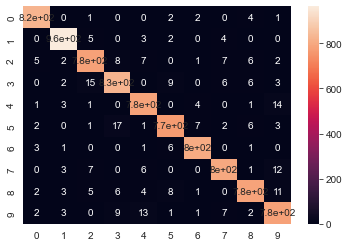

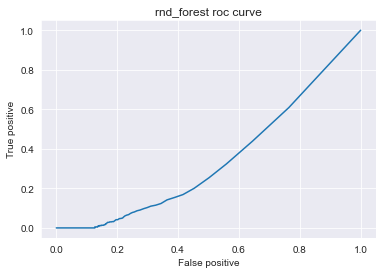

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import seaborn as sns


# Accuracies
def print_scores(y_train, y_test, y_pred_train, y_pred_test):
    print(f"Train accuracy: {accuracy_score(y_train, y_pred_train)}.")
    print(f"Test accuracy: {accuracy_score(y_test, y_pred_test)}.")


# Confusion matrix
def print_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True)
    plt.show()


# ROC curve
def print_roc_curve(model, X_test, y_test, name, title):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=9)
    plt.plot(fpr, tpr, label=name)
    plt.xlabel("False positive")
    plt.ylabel("True positive")
    plt.title(title)
    plt.show()


print_scores(y_train, y_test, y_pred_train, y_pred_test)
print_confusion_matrix(y_test, y_pred_test)
print_roc_curve(rnd_forest, X_test, y_test, "RandomForestClassifier", "rnd_forest roc curve")

## Images processing for true training and test

## Reload true data

In [11]:
X_train = X
y_train = y

df_test = pd.read_csv("Datasets/test.csv")
X_test = df_test
y_test = []  # Empty no labels for test data

## Scale data

In [15]:
# Made in pipe

from sklearn.preprocessing import MinMaxScaler

## Rescale to -1,+1 in our case 0,+1 because we only have positive pixels' value:
scale = MinMaxScaler()

# fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data.
X_train = scale.fit_transform(X_train)

# Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data.
X_test = scale.transform(X_test)

## Data augmentation

In [16]:
from scipy.ndimage import shift
from scipy.ndimage import rotate
from scipy.ndimage import zoom
from random import randrange
import numpy as np


def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])


def rotate_image(image, angle):
    image = image.reshape((28, 28))
    rotated_image = rotate(image, angle, reshape=False)
    return rotated_image.reshape([-1])


# Thanks to the answers on the following thread for the function
# https://stackoverflow.com/questions/37119071/scipy-rotate-and-zoom-an-image-without-changing-its-dimensions
def clipped_zoom(img, zoom_factor):
    img = img.reshape((28, 28))
    h, w = img.shape[:2]
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)
    if zoom_factor < 1:
        zh = int(np.round(h * zoom_factor))
        zw = int(np.round(w * zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2
        out = np.zeros_like(img)
        out[top:top + zh, left:left + zw] = zoom(img, zoom_tuple)
    elif zoom_factor > 1:
        zh = int(np.round(h / zoom_factor))
        zw = int(np.round(w / zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2
        out = zoom(img[top:top + zh, left:left + zw], zoom_tuple)
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top + h, trim_left:trim_left + w]
    else:
        out = img
    return out.reshape([-1])


X_train_augmented = list(X_train)
y_train_augmented = list(y_train)

# Add shifted images
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (-1, -1), (1, -1), (-1, 1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

# Add rotated images
for image, label in zip(X_train, y_train):
    X_train_augmented.append(rotate_image(image, randrange(0, 28)))
    y_train_augmented.append(label)
    X_train_augmented.append(rotate_image(image, -randrange(0, 28)))
    y_train_augmented.append(label)

# Add zoomed images
for image, label in zip(X_train, y_train):
    X_train_augmented.append(clipped_zoom(image, randrange(5, 16) / 10))
    y_train_augmented.append(label)

## Model creation

In [17]:
rnd_forest = RandomForestClassifier(n_estimators=gsCV.best_params_['rnd_forest__n_estimators'])

## Train

In [18]:
print(rnd_forest.fit(X_train_augmented, y_train_augmented))

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('rnd_forest', RandomForestClassifier(n_estimators=1000))])


## Predict

In [19]:
y_pred_real = rnd_forest.predict(X_test)

## Write predictions to csv

In [20]:
df_pred = pd.DataFrame({'ImageId': list(range(1, len(y_pred_real) + 1)), 'Label': y_pred_real})
df_pred.to_csv("Im-Rises_rnd_forest_main.csv", index=False)
print(df_pred.head())
# Score: 0.98064


   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3
